In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("data/pima_diabetes/pima-indians-diabetes.csv")

df.columns = ['pregnancies', 'glucose', 'blood_pressure', 'skin_thickness', 'insulin', 'bmi', 'diabetes_pedigree', 'age_yr', 'outcome']

In [7]:
df.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree,age_yr,outcome
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [8]:
df.isnull().sum()

pregnancies          0
glucose              0
blood_pressure       0
skin_thickness       0
insulin              0
bmi                  0
diabetes_pedigree    0
age_yr               0
outcome              0
dtype: int64

In [9]:
df.describe()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree,age_yr,outcome
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,120.859192,69.101695,20.517601,79.903520,31.990482,0.471674,33.219035,0.348110
std,3.370877,31.978468,19.368155,15.954059,115.283105,7.889091,0.331497,11.752296,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot:xlabel='outcome', ylabel='count'>

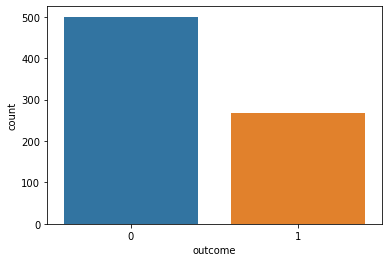

In [14]:
sns.countplot(x= 'outcome', data=df)

In [15]:
X = df.drop('outcome', axis='columns')
y = df.outcome

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, random_state=20)

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

scores = cross_val_score(DecisionTreeClassifier(), X_scaled, y, cv=5)
scores

array([0.71428571, 0.68831169, 0.70588235, 0.76470588, 0.73202614])

In [20]:
scores.mean()

0.7210423563364741

In [22]:
from sklearn.ensemble import BaggingClassifier

bag_model = BaggingClassifier(
    base_estimator = DecisionTreeClassifier(),
    n_estimators=100,
    max_samples=0.8,
    oob_score=True,
    random_state=0
)

bag_model.fit(X_train, y_train)

bag_model.oob_score_

0.7443478260869565

In [23]:
bag_model.score(X_test, y_test)

0.7864583333333334

In [24]:
bag_model = BaggingClassifier(
    base_estimator = DecisionTreeClassifier(),
    n_estimators=100,
    max_samples=0.8,
    oob_score=True,
    random_state=0
)


scores = cross_val_score(bag_model, X_scaled, y, cv=5)
scores.mean()

0.7601392071980306

In [25]:
from sklearn.ensemble import RandomForestClassifier

scores = cross_val_score(RandomForestClassifier(), X, y, cv=5)
scores.mean()

0.7627790510143451